In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dynesty import utils as dyfunc
import pickle
from dyLens.utils import Analysis

In [2]:
result_path = "./172209/model1/normal/"
phase_name = "phase5"

with open(result_path+'/shear/dyLens/{}/Final_sampler_{}.pickle'.format(phase_name,phase_name),'rb') as f:
    sampler = pickle.load(f)
    f.close()
    try:
        sampler = sampler["sampler"]
    except:
        sampler = sampler
        
with open(result_path+'/shear/dyLens/{}/{}.pickle'.format(phase_name,phase_name),'rb') as f:
    phase = pickle.load(f)
    f.close()

with open(result_path+'/shear/dyLens/{}/CombinedModel_{}.pickle'.format(phase_name,phase_name),'rb') as f:
    CM = pickle.load(f)
    f.close()

with open(result_path+'/shear/dyLens/{}/priors_{}.pickle'.format(phase_name,phase_name),'rb') as f:
    priors = pickle.load(f)
    f.close()


In [3]:
A = Analysis.Analysis(sampler=sampler, dyLens_phase=phase, ncores=8)
        

Initializing dyLens analysis.
####################################

Summary
nlive: 500
niter: 2847
ncall: 34625
eff(%):  9.666
logz: 6601.529 +/-  0.103

Fiducial values and 68% confidence level.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters Updated!


In [4]:
results_sim = dyfunc.jitter_run(dyfunc.resample_run(sampler.results))

samples_sim = results_sim.samples
weights = np.exp(results_sim.logwt - results_sim.logz[-1])  # normalized weights
mean, cov = dyfunc.mean_and_cov(samples_sim, weights)

new_samples = dyfunc.resample_equal(samples_sim, weights)

In [5]:
parsRes = priors.copy()

In [14]:
parsRes

{'inc': 81.08440292145235,
 'beta': <dyLens.utils.priors.UniformPrior at 0x7f6dcc89b1c0>,
 'ml': <dyLens.utils.priors.UniformPrior at 0x7f6dcc419570>,
 'log_rho_s': <dyLens.utils.priors.UniformPrior at 0x7f6dcc419720>,
 'rs': <dyLens.utils.priors.UniformPrior at 0x7f6dcc419990>,
 'slope': <dyLens.utils.priors.UniformPrior at 0x7f6dcc41a080>,
 'mag_shear': <dyLens.utils.priors.UniformPrior at 0x7f6dcc41a230>,
 'phi_shear': <dyLens.utils.priors.UniformPrior at 0x7f6dcc41a410>}

In [23]:
total = []
lens  = []
kin   = []
for i in range( 1000 ):
    for k, v in enumerate(parsRes):
        parsRes[v] = new_samples[-i][k]
    A.phase.CombinedModel.Updt_Model(parsRes)

    total.append( A.phase.CombinedModel.run_current(quiet=True) )
    kin.append( A.phase.CombinedModel.dyn_figure_of_merit )
    lens.append( A.phase.CombinedModel.lens_figure_of_merit )

Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!


Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!


Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!
Parameters Updated!


In [30]:
np.savetxt("subhalo172209_figure_of_merit.txt", np.column_stack([total, kin, lens]), header="total \t kin \t lens" )

In [36]:
total = np.asarray(total)
kin = np.asarray(kin)
lens = np.asarray(lens)

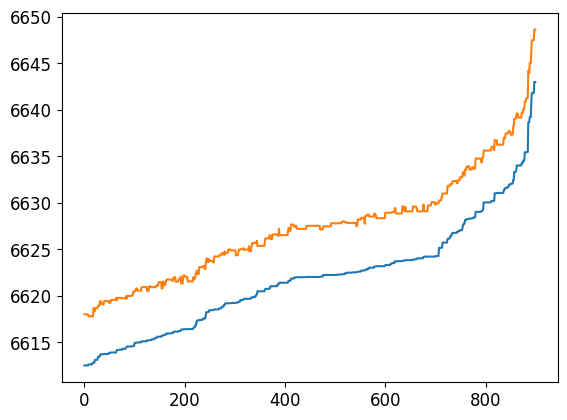

In [43]:
plt.plot(total[np.argsort(total)][100:1000])
plt.plot(lens[np.argsort(total)][100:1000])

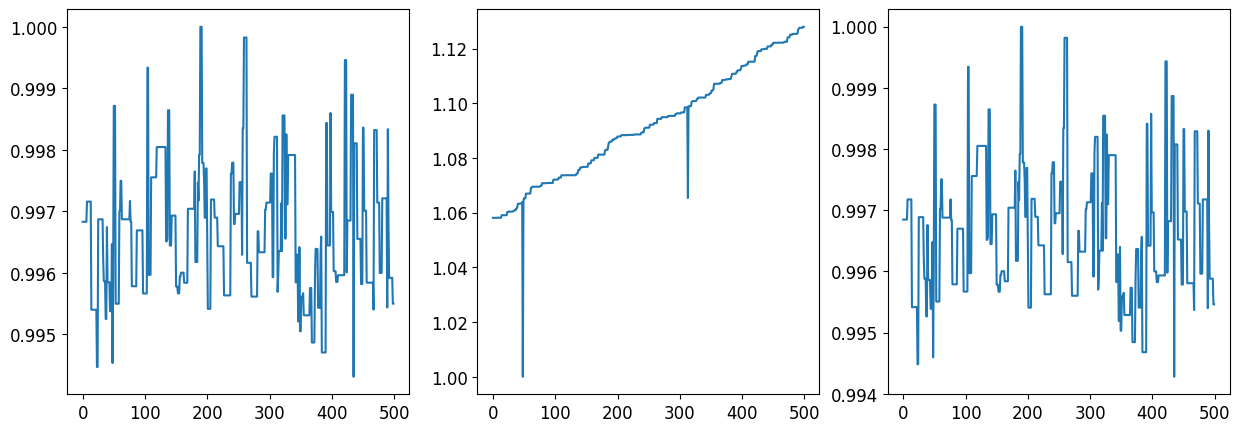

In [58]:
plt.figure(figsize=(15,5))
i = 500
ii = 1000
plt.subplot(131)
plt.plot(lens[i:ii]/lens[i:ii].max())
plt.subplot(132)
plt.plot(kin[i:ii]/kin[i:ii].max())
plt.subplot(133)
plt.plot(total[i:ii]/total[i:ii].max())

In [113]:
data_path = "/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo7/"
from astropy.io import fits

In [114]:
# surface mass density in 1e10 Msun/kpc2
sigma_M    = fits.open(data_path+"/imgs/surface_mass_density.fits")[0]        
    # kappa from data. The critical density is in Msun/Mpc2, so I convert it to Msun/kpc2
kappa_data = (sigma_M.data*1e10)/ ( CM.Lens_model.critical_density/(1e3)**2 )

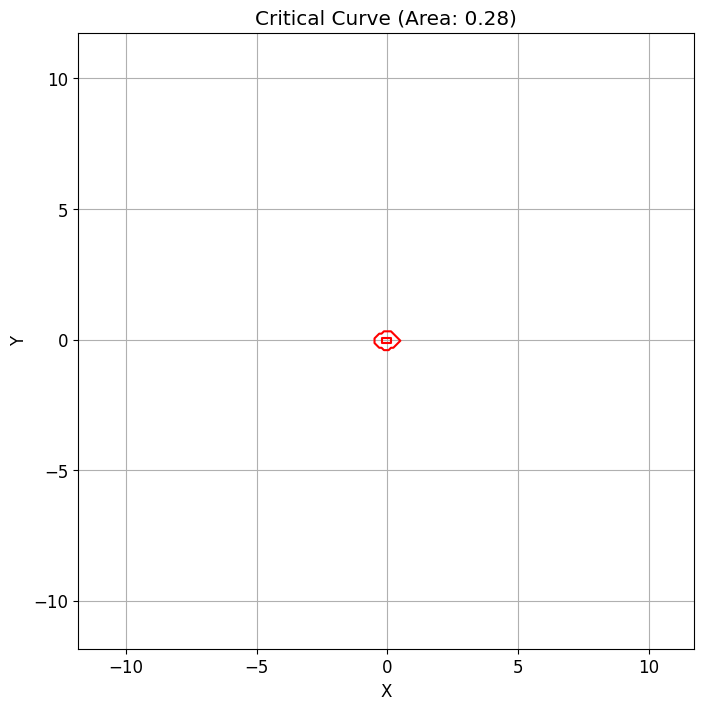

In [121]:
# Find the critical curve where kappa_map = 1
x_range = np.arange(-(smoothed_kappa_map.shape[1]/2)*0.09, (smoothed_kappa_map.shape[1]/2)*0.09, 0.09)
y_range = np.arange(-(smoothed_kappa_map.shape[1]/2)*0.09, (smoothed_kappa_map.shape[1]/2)*0.09, 0.09)


critical_curve = np.isclose(kappa_data, 1.0, atol=0.5)

# Calculate the enclosed area of the critical curve
area = np.sum(critical_curve) * (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])

# Plot the critical curve
plt.figure(figsize=(8, 8))
plt.contour(x_range, y_range, critical_curve, levels=[0], colors='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Critical Curve (Area: {area:.2f})')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()


In [122]:
np.sqrt(area/np.pi)

0.2960786089115789

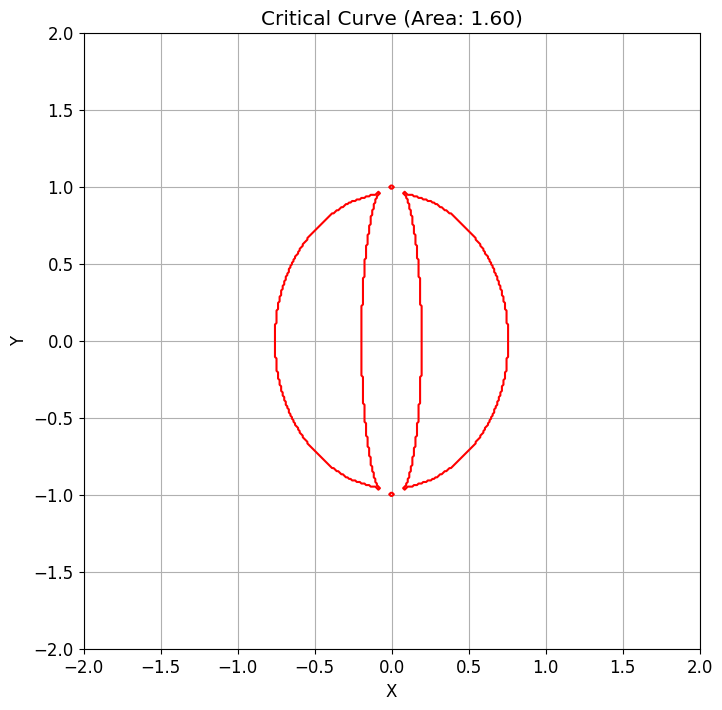

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Define the convergence map (replace this with your actual convergence map)
def convergence_map(x, y,q):
    # Define your convergence map here.
    # For simplicity, let's assume a circular lens.
    radius = 1.0  # Adjust this value based on your lens model
    return np.where(np.sqrt((x/q)**2 + y**2) <= radius, 1.0, 0.0)

# Define the range of coordinates for your image plane
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)

# Create a grid of coordinates
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Calculate the convergence map
kappa_map1 = convergence_map(x_grid, y_grid, 0.8)
kappa_map2 = convergence_map(x_grid, y_grid, 0.15)
kappa_map = kappa_map1 + kappa_map2
# Smooth the convergence map to make contours more accurate (adjust sigma as needed)
sigma = 2.0
smoothed_kappa_map = gaussian_filter(kappa_map, sigma)

# Find the critical curve where kappa_map = 1
critical_curve = np.isclose(smoothed_kappa_map, 1.0, atol=0.01)

# Calculate the enclosed area of the critical curve
area = np.sum(critical_curve) * (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])

# Plot the critical curve
plt.figure(figsize=(8, 8))
plt.contour(x_range, y_range, critical_curve, levels=[0], colors='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Critical Curve (Area: {area:.2f})')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()


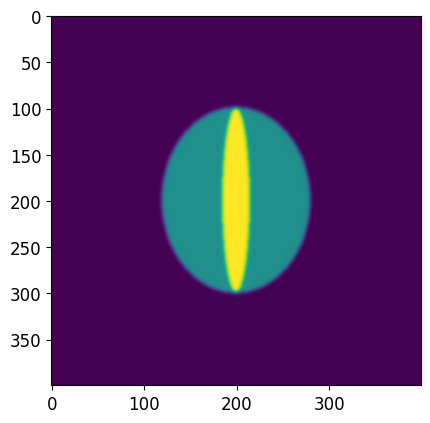

In [67]:
plt.imshow(smoothed_kappa_map)